In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read Data
data = pd.read_csv('../data/amazon_sentiment_data.csv', encoding='cp437')
data = data.sample(frac=1)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5820\4222399212.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/amazon_sentiment_data.csv', encoding='cp437')


In [3]:
#Train and Test Data Split
# #split data-set to train and test

X = data['review_body']
Y = data['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle=True)

In [4]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

In [5]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)
    clean_SpecialChar = " ".join(filter(lambda x:x[0]!='&',  clean_SpecialChar.split()))
    clean_SpecialChar = " ".join(filter(lambda x:x[0]!='\\', clean_SpecialChar.split()))
    clean_SpecialChar = clean_SpecialChar.replace("\n", '')
    clean_SpecialChar = clean_SpecialChar.replace("\r", '')
    return clean_SpecialChar

In [6]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase)) 

In [7]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

In [8]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    X_train_cleaned.append(val) 
    
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    X_test_cleaned.append(val) 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5820\3357511827.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


In [9]:
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

              precision  recall  f1-score  support
0                  0.82    0.73      0.77   1479.0
1                  0.93    0.95      0.94   5154.0
accuracy           0.90    0.90      0.90      0.9
macro avg          0.87    0.84      0.86   6633.0
weighted avg       0.90    0.90      0.90   6633.0


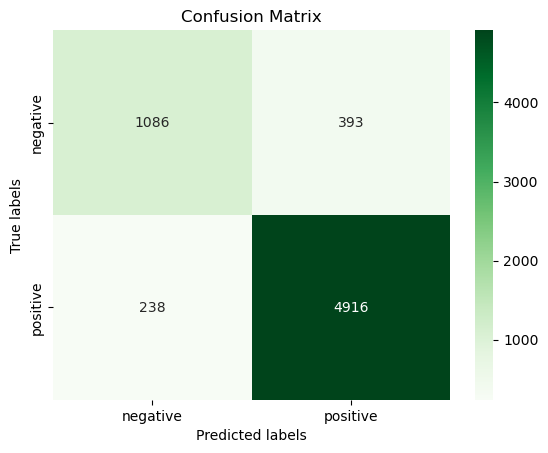

In [10]:
# Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# confusion matrix
svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

              precision  recall  f1-score  support
0                  0.87    0.55      0.67  1479.00
1                  0.88    0.98      0.93  5154.00
accuracy           0.88    0.88      0.88     0.88
macro avg          0.88    0.76      0.80  6633.00
weighted avg       0.88    0.88      0.87  6633.00


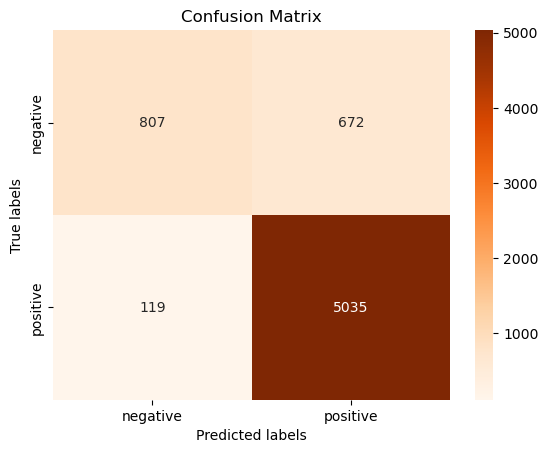

In [11]:
# Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
ranfrst_predictions = random_forest.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,ranfrst_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# confusion matrix
ranfrst_predictions=random_forest.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,ranfrst_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Oranges');  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [12]:
# K-Nearest Neighbor model
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
knn_predictions = knn.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,knn_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)
# confusion matrix
knn_predictions=knn.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,knn_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

KeyboardInterrupt: 

In [ ]:
# Logistic regression model
lr = LogisticRegression()
lr.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
lr_predictions = lr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,lr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# confusion matrix
lr_predictions=lr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,lr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='PuBu');  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
#Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

# Logistic regression model
gr = GradientBoostingClassifier(learning_rate=0.1)
gr.fit(X_train_tvec, Y_train)

# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
gr_predictions = gr.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,gr_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
print(data_report)

# confusion matrix
gr_predictions=gr.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,gr_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='RdPu');  
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [ ]:
import matplotlib.pyplot as plt

pf_dict = {
    'classifiers': ["SVM", "RF", "KNN", "LR", "GB"],
    'train_accuracies': [91, 90, 74, 91, 86]
        }

df = pd.DataFrame(pf_dict)
df.plot(x='classifiers', y='train_accuracies', kind='line')
plt.show()

In [ ]:
#LR and svm had a same accuracy but LR takes time more than SVM hence, SVM considered for model deploynment

import pickle

#dump on picle
pickle.dump(svr_lin, open('../Model/electronicSentimentAnalyzer.pkl','wb'))

In [ ]:
demo_review = ["I love it very much this app"]
demo_review_X_test = tvec.transform(demo_review)
svr_lin.predict(demo_review_X_test)

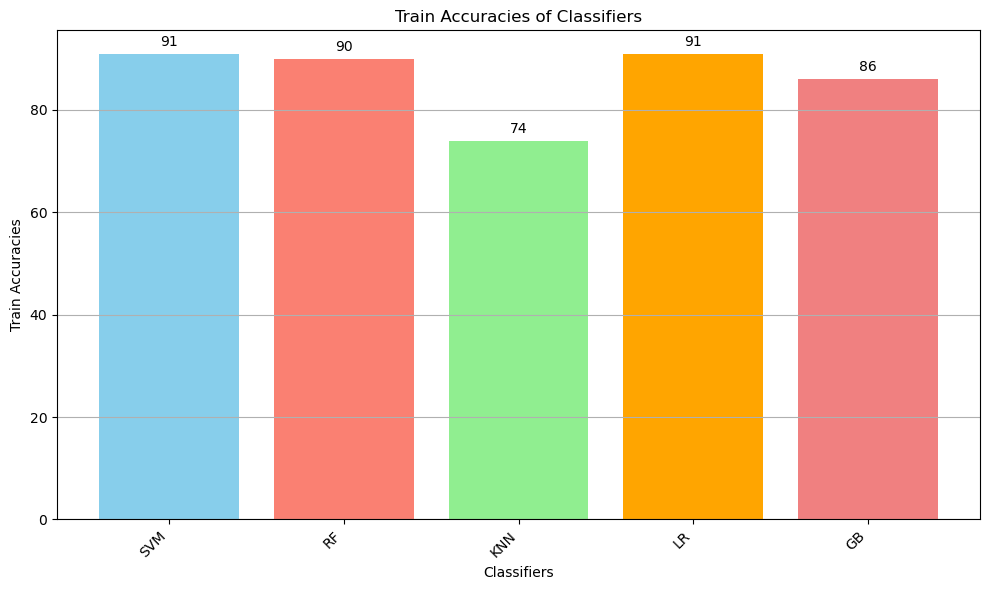

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pf_dict = {
    'classifiers': ["SVM", "RF", "KNN", "LR", "GB"],
    'train_accuracies': [91, 90, 74, 91, 86]
}

df = pd.DataFrame(pf_dict)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Define custom colors for bars
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral']

# Plot bars
bars = plt.bar(df['classifiers'], df['train_accuracies'], color=colors)

# Add labels on top of each bar
for bar, val in zip(bars, df['train_accuracies']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(val), ha='center', va='bottom')

plt.xlabel('Classifiers')
plt.ylabel('Train Accuracies')
plt.title('Train Accuracies of Classifiers')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along the y-axis

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()